## Projet 1 : Topic Modeling des Avis des Produits

Installer SpaCy et télécharger le modèle de langue anglais

In [21]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import spacy

# Charger le modèle de langue anglaise
nlp = spacy.load("en_core_web_sm")

# PARTIE I : Prétraitement des Avis de Produits

In [2]:
from google.colab import files

# Téléchargez les fichiers JSONL depuis local vers Google Colab
uploaded = files.upload()

# Afficher les noms des fichiers téléchargés
print(uploaded)

Saving reviews.jsonl to reviews.jsonl
Saving meta.jsonl to meta.jsonl
{'reviews.jsonl': b'{"rating": 4.0, "title": "No white background! It\\u2019s clear!", "text": "I bought this bc I thought it had the nice white background. Turns out it\\u2019s clear & since my phone is blue it doesn\\u2019t look anything like this.  If I had known that I would have purchased something else. It works ok.", "images": [{"small_image_url": "https://images-na.ssl-images-amazon.com/images/I/B1PrCo7ZjXS._SL256_.jpg", "medium_image_url": "https://images-na.ssl-images-amazon.com/images/I/B1PrCo7ZjXS._SL800_.jpg", "large_image_url": "https://images-na.ssl-images-amazon.com/images/I/B1PrCo7ZjXS._SL1600_.jpg", "attachment_type": "IMAGE"}], "asin": "B08L6L3X1S", "parent_asin": "B08L6L3X1S", "user_id": "AFKZENTNBQ7A7V7UXW5JJI6UGRYQ", "timestamp": 1612044451196, "helpful_vote": 0, "verified_purchase": true}\n{"rating": 5.0, "title": "Awesome!  Great price!  Works well!", "text": "Perfect. How pissed am I that I r

In [20]:
import pandas as pd

# Charger les fichiers JSONL dans des DataFrames pandas
meta_data = pd.read_json('meta.jsonl', lines=True)
reviews_data = pd.read_json('reviews.jsonl', lines=True)

# Afficher un aperçu des données
print("Aperçu des métadonnées :")
print(meta_data.head())

print("\nAperçu des avis clients :")
print(reviews_data.head())

Aperçu des métadonnées :
               main_category  \
0  Cell Phones & Accessories   
1  Cell Phones & Accessories   
2  Cell Phones & Accessories   
3  Cell Phones & Accessories   
4  Cell Phones & Accessories   

                                               title  average_rating  \
0  ARAREE Slim Diary Cell Phone Case for Samsung ...             3.8   
1  Bastmei for OnePlus 7T Case Extremely Light Ul...             4.4   
2  Wireless Fones Branded New Iphone 5C/LITE Hot ...             4.0   
3  iPhone 6 Plus + Case, DandyCase Perfect PATTER...             4.0   
4  Case for Galaxy S6/S6 Edge, Thin Translucent V...             4.0   

   rating_number                                           features  \
0              5  [Genuine Cow leather with 6 different colors, ...   
1            177  [Ultra-thin & Ultra-light: The ultra slim fit ...   
2              2                                                 []   
3             15  [Slim-Fit design for the iPhone 6 Plus (5.5" s.

1- Traitement linguistique en synthese

In [23]:
def preprocess_text(text, nlp_model):
    """
    Applique le prétraitement linguistique :
    - Tokenisation
    - Lemmatisation
    - Suppression des stop words
    - Suppression de la ponctuation et des éléments non pertinents
    """
    # Appliquer SpaCy au texte
    doc = nlp_model(text.lower())  # Convertir le texte en minuscule

    # Filtrer les tokens (lemmatisation et exclusion des stopwords et ponctuation)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]

    # Retourner les tokens sous forme de texte
    return " ".join(tokens)

# Appliquer le prétraitement à la colonne 'text' des avis
reviews_data['cleaned_text'] = reviews_data['text'].apply(lambda x: preprocess_text(x, nlp))

# Afficher un aperçu des avis nettoyés
print("Aperçu des avis après prétraitement :")
print(reviews_data[['title', 'cleaned_text']].head())

Aperçu des avis après prétraitement :
                                 title  \
0     No white background! It’s clear!   
1  Awesome!  Great price!  Works well!   
2   Worked but took an hour to install   
3                               Decent   
4                             LOVE IT!   

                                        cleaned_text  
0  buy bc think nice white background turn clear ...  
1  perfect pissed recently pay fitbit cable promp...  
2  overall happy end result hate puzzle love puzz...  
3  last month lock button break decent product co...  
4             love case work well expensive case lol  


2.Traitement linguistique

2-1 Tokenisation

Selection du premier avis client

In [24]:
sample_text = reviews_data['text'].iloc[0]  # Prendre le premier avis

# Appliquer SpaCy pour obtenir les tokens
doc = nlp(sample_text)

# Extraire les tokens
tokens = [token.text for token in doc]

# Afficher les tokens
print("Tokens :")
print(tokens)

Tokens :
['I', 'bought', 'this', 'bc', 'I', 'thought', 'it', 'had', 'the', 'nice', 'white', 'background', '.', 'Turns', 'out', 'it', '’s', 'clear', '&', 'since', 'my', 'phone', 'is', 'blue', 'it', 'does', 'n’t', 'look', 'anything', 'like', 'this', '.', ' ', 'If', 'I', 'had', 'known', 'that', 'I', 'would', 'have', 'purchased', 'something', 'else', '.', 'It', 'works', 'ok', '.']


2-2 Lemmatisation

In [25]:
# Appliquer la lemmatisation sur les tokens
lemmatized_tokens = [token.lemma_ for token in doc]

# Afficher les tokens après lemmatisation
print("Lemmatisation :")
print(lemmatized_tokens)

Lemmatisation :
['I', 'buy', 'this', 'bc', 'I', 'think', 'it', 'have', 'the', 'nice', 'white', 'background', '.', 'turn', 'out', 'it', '’', 'clear', '&', 'since', 'my', 'phone', 'be', 'blue', 'it', 'do', 'not', 'look', 'anything', 'like', 'this', '.', ' ', 'if', 'I', 'have', 'know', 'that', 'I', 'would', 'have', 'purchase', 'something', 'else', '.', 'it', 'work', 'ok', '.']


2-3 Suppression des stop words

In [26]:
# Filtrer les tokens pour supprimer les stop words
filtered_tokens = [token.lemma_ for token in doc if not token.is_stop]

# Afficher les tokens après suppression des stop words
print("Après suppression des stop words :")
print(filtered_tokens)

Après suppression des stop words :
['buy', 'bc', 'think', 'nice', 'white', 'background', '.', 'turn', 'clear', '&', 'phone', 'blue', 'look', 'like', '.', ' ', 'know', 'purchase', '.', 'work', 'ok', '.']


2-4 Exclusion des éléments non pertinents

In [27]:
# Filtrer les tokens pour exclure la ponctuation et les termes non alphabétiques
cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

# Afficher les tokens après exclusion des éléments non pertinents
print("Après exclusion des éléments non pertinents (ponctuation, chiffres, etc.) :")
print(cleaned_tokens)

Après exclusion des éléments non pertinents (ponctuation, chiffres, etc.) :
['buy', 'bc', 'think', 'nice', 'white', 'background', 'turn', 'clear', 'phone', 'blue', 'look', 'like', 'know', 'purchase', 'work', 'ok']


In [28]:
from collections import Counter

# Compter la fréquence des mots après nettoyage
word_freq = Counter(cleaned_tokens)

# Afficher les 10 mots les plus fréquents
print("20 mots les plus fréquents après prétraitement :")
print(word_freq.most_common(20))

20 mots les plus fréquents après prétraitement :
[('buy', 1), ('bc', 1), ('think', 1), ('nice', 1), ('white', 1), ('background', 1), ('turn', 1), ('clear', 1), ('phone', 1), ('blue', 1), ('look', 1), ('like', 1), ('know', 1), ('purchase', 1), ('work', 1), ('ok', 1)]


In [29]:
# Appliquer le traitement complet (lemmatisation, suppression des stop words, exclusion des éléments non pertinents)
def preprocess_to_tokens(text, nlp_model):
    """
    Prétraitement pour générer une liste de tokens filtrés :
    - Lemmatisation
    - Suppression des stop words
    - Exclusion de la ponctuation et des termes non pertinents
    """
    doc = nlp_model(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return tokens

# Appliquer le prétraitement à la colonne 'text' des avis
reviews_data['filtered_tokens'] = reviews_data['text'].apply(lambda x: preprocess_to_tokens(x, nlp))

# Afficher un aperçu des données après ajout des tokens
print("Aperçu des données avec tokens filtrés :")
print(reviews_data[['title', 'filtered_tokens']].head())

Aperçu des données avec tokens filtrés :
                                 title  \
0     No white background! It’s clear!   
1  Awesome!  Great price!  Works well!   
2   Worked but took an hour to install   
3                               Decent   
4                             LOVE IT!   

                                     filtered_tokens  
0  [buy, bc, think, nice, white, background, turn...  
1  [perfect, pissed, recently, pay, fitbit, cable...  
2  [overall, happy, end, result, hate, puzzle, lo...  
3  [last, month, lock, button, break, decent, pro...  
4     [love, case, work, well, expensive, case, lol]  


In [30]:
# Sauvegarder les listes de tokens dans un fichier JSON
reviews_data[['title', 'filtered_tokens']].to_json('filtered_reviews.json', orient='records', lines=True)

print("Les données préparées ont été sauvegardées dans le fichier 'filtered_reviews.json'.")

Les données préparées ont été sauvegardées dans le fichier 'filtered_reviews.json'.


In [31]:
from google.colab import files

# Télécharger le fichier JSON
files.download('filtered_reviews.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 # PAETIE II - Clustering non supervisé des documents pour identifier des topics et mots-clés

1.Génération des embeddings

In [32]:
import json

# Charger le fichier JSON contenant les tokens pré-traités
with open('filtered_reviews.json', 'r') as file:
    documents = [json.loads(line)['filtered_tokens'] for line in file]

# Vérification
print("Exemple de document pré-traité :")
print(documents[0])

Exemple de document pré-traité :
['buy', 'bc', 'think', 'nice', 'white', 'background', 'turn', 'clear', 'phone', 'blue', 'look', 'like', 'know', 'purchase', 'work', 'ok']


In [33]:
# Installer SentenceTransformers
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Charger le modèle SentenceTransformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convertir chaque document en une chaîne de texte avant de générer les embeddings
text_documents = [" ".join(tokens) for tokens in documents]

# Générer les embeddings
embeddings = model.encode(text_documents)

print("Taille des embeddings générés :")
print(embeddings.shape)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Taille des embeddings générés :
(1000, 384)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Générer la matrice TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(text_documents)

print("Dimensions de la matrice TF-IDF :")
print(tfidf_matrix.shape)

Dimensions de la matrice TF-IDF :
(1000, 2620)


Commentaires : La matrice TF-IDF de dimensions (1000, 2620) indique qu'il y a 1000 documents et 2620 termes uniques après prétraitement. Cela montre un vocabulaire riche et une bonne granularité pour appliquer des méthodes comme le clustering ou l'analyse thématique.

2.Clustering

Clustering avec KMeans

In [35]:
from sklearn.cluster import KMeans

# Définir le nombre de clusters
num_clusters = 5

# Initialiser et ajuster le modèle KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Obtenir les labels des clusters
kmeans_labels = kmeans.labels_

# Ajouter les clusters aux documents
reviews_data['cluster'] = kmeans_labels

print("Distribution des documents par cluster (KMeans) :")
print(reviews_data['cluster'].value_counts())

Distribution des documents par cluster (KMeans) :
cluster
4    356
2    271
1    185
3    182
0      6
Name: count, dtype: int64


Commentaires : La distribution des documents par cluster montre que les clusters 4, 2, 1 et 3 regroupent la majorité des documents, avec des tailles respectives décroissantes. Cependant, le cluster 0 contient seulement 6 documents, ce qui pourrait indiquer un groupe d'avis très spécifiques ou des données bruitées.

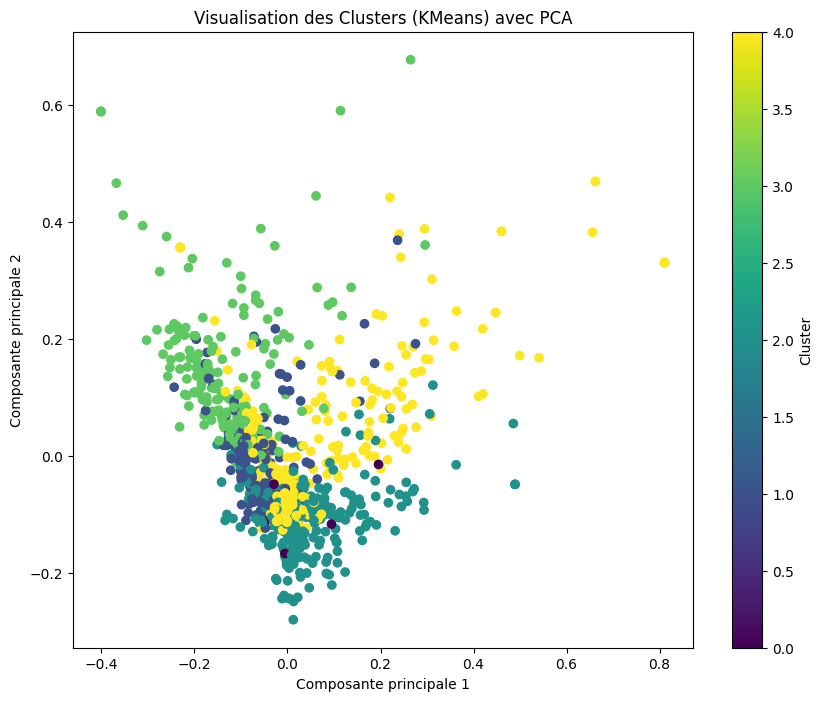

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire la dimension à 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(tfidf_matrix.toarray())

# Ajouter les composantes PCA aux données
reviews_data['pca1'] = pca_components[:, 0]
reviews_data['pca2'] = pca_components[:, 1]

# Visualiser les clusters avec un graphique
plt.figure(figsize=(10, 8))
plt.scatter(reviews_data['pca1'], reviews_data['pca2'], c=reviews_data['cluster'], cmap='viridis', marker='o')
plt.title('Visualisation des Clusters (KMeans) avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()


In [37]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# Utiliser une mesure de similarité (DBSCAN fonctionne mieux avec des distances)
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Initialiser et ajuster le modèle DBSCAN
dbscan = DBSCAN(metric='precomputed', eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(cosine_sim_matrix)

# Ajouter les clusters aux documents
reviews_data['dbscan_cluster'] = dbscan_labels

print("Distribution des documents par cluster (DBSCAN) :")
print(reviews_data['dbscan_cluster'].value_counts())

Distribution des documents par cluster (DBSCAN) :
dbscan_cluster
0    1000
Name: count, dtype: int64


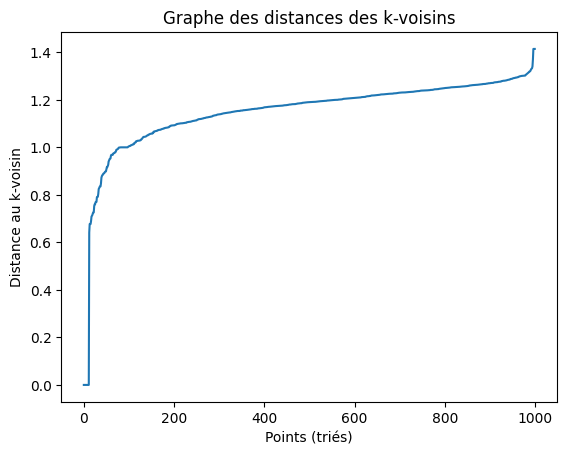

In [38]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Définir min_samples pour DBSCAN
min_samples = 5

# Calculer les distances des k plus proches voisins
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(tfidf_matrix)
distances, indices = nearest_neighbors.kneighbors(tfidf_matrix)

# Trier les distances pour visualiser le coude
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title('Graphe des distances des k-voisins')
plt.xlabel('Points (triés)')
plt.ylabel('Distance au k-voisin')
plt.show()


In [39]:
from sklearn.cluster import DBSCAN

# Paramètres ajustés
adjusted_eps = 0.8  # Remplacez par la valeur trouvée
adjusted_min_samples = 5

# Réexécution de DBSCAN
dbscan_adjusted = DBSCAN(metric='cosine', eps=adjusted_eps, min_samples=adjusted_min_samples)
dbscan_labels_adjusted = dbscan_adjusted.fit_predict(tfidf_matrix)

# Ajouter les labels ajustés au DataFrame
reviews_data['dbscan_adjusted_cluster'] = dbscan_labels_adjusted

print("Distribution des documents par cluster (DBSCAN ajusté) :")
print(reviews_data['dbscan_adjusted_cluster'].value_counts())


Distribution des documents par cluster (DBSCAN ajusté) :
dbscan_adjusted_cluster
 0    957
-1     43
Name: count, dtype: int64


3.Analyse des clusters

In [40]:
# Associer les documents aux clusters obtenus par KMeans
reviews_data['cluster'] = kmeans_labels  # Utilisez kmeans_labels pour les clusters KMeans

# Regrouper les documents par cluster
clustered_reviews = reviews_data.groupby('cluster')['text'].apply(list)

# Afficher un exemple de documents pour chaque cluster
for cluster_num, docs in clustered_reviews.items():
    print(f"Cluster {cluster_num}: {len(docs)} documents")
    print("Exemple de documents :")
    print(docs[:2])  # Afficher les deux premiers documents de chaque cluster
    print("\n")


Cluster 0: 6 documents
Exemple de documents :
["Good phone, match what I have read so far.  On the plus side:<br /><br />- Speedy finger prints (suffered from Samsung Tab S's clumsy and unreliable swipe finger print, this is heaven.)<br />- Good battery standby (2% decrease overnight)<br /><br />On the minus side, when I take a phone call, the screen goes complete dark and can't bring it back by touching (you can get it back by click the power key), also the speaker voice sometimes feels tapering off ... need more time to get used to; Also, the default system font feels weird, so it is thin and small, and doesn't match with the rest of the fonts.<br /><br />Bottom line: the best in its class. Hoping for Marshmallow update.<br /><br />Update: after a month, Honor 5X received its first update and it is a letdown ... First, the update itself is a 125MB package without any note on what it is for; Second, and more important to the take off of one star: after the update, two apps are added a

Fréquences des mots dans chaque clusters et les 10 mots les plus fréquents

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Initialiser le CountVectorizer pour obtenir la fréquence brute des mots (en excluant les mots fonctionnels)
vectorizer = CountVectorizer(stop_words='english')

# Dictionnaire pour stocker la matrice de fréquence de mots pour chaque cluster
word_frequencies_per_cluster = {}

# Calculer la fréquence des mots pour chaque cluster
for cluster_num, docs in clustered_reviews.items():
    # Calculer la fréquence des mots dans les documents du cluster
    word_frequencies_per_cluster[cluster_num] = vectorizer.fit_transform(docs)

    # Convertir la matrice de fréquence en un DataFrame pour une meilleure lisibilité
    word_freq_df = pd.DataFrame(word_frequencies_per_cluster[cluster_num].toarray(), columns=vectorizer.get_feature_names_out())

    # Calculer la fréquence totale pour chaque mot dans le cluster
    word_freq_sum = word_freq_df.sum(axis=0).sort_values(ascending=False)

    # Afficher les 10 mots les plus fréquents dans le cluster
    print(f"Cluster {cluster_num} - Fréquence des mots :")
    print(word_freq_sum.head(10))  # Afficher les 10 mots les plus fréquents
    print("\n")

Cluster 0 - Fréquence des mots :
br          11
cable        7
phone        7
car          5
update       5
cables       4
usb          4
minutes      3
bring        3
received     3
dtype: int64


Cluster 1 - Fréquence des mots :
phone    321
case      74
br        60
use       57
34        49
fits      45
like      43
just      40
cover     37
fit       35
dtype: int64


Cluster 2 - Fréquence des mots :
screen     121
phone      104
br          96
reviews     72
work        70
charge      70
just        69
charger     66
time        64
works       60
dtype: int64


Cluster 3 - Fréquence des mots :
case          419
phone         280
good           54
br             51
like           50
great          49
iphone         47
cases          46
love           44
protection     41
dtype: int64


Cluster 4 - Fréquence des mots :
great    138
like      60
easy      53
love      53
nice      50
br        49
good      49
band      44
just      38
price     37
dtype: int64




In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialiser le CountVectorizer pour extraire les bigrams (deux mots consécutifs)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))

# Dictionnaire pour stocker la matrice de fréquence de bigrams pour chaque cluster
bigram_frequencies_per_cluster = {}

# Calculer la fréquence des bigrams pour chaque cluster
for cluster_num, docs in clustered_reviews.items():
    # Calculer la fréquence des bigrams dans les documents du cluster
    bigram_frequencies_per_cluster[cluster_num] = vectorizer.fit_transform(docs)

    # Convertir la matrice de fréquence en un DataFrame pour une meilleure lisibilité
    bigram_freq_df = pd.DataFrame(bigram_frequencies_per_cluster[cluster_num].toarray(), columns=vectorizer.get_feature_names_out())

    # Calculer la fréquence totale pour chaque bigram dans le cluster
    bigram_freq_sum = bigram_freq_df.sum(axis=0).sort_values(ascending=False)

    # Afficher les 10 bigrams les plus fréquents dans le cluster
    print(f"Cluster {cluster_num} - Fréquence des bigrams :")
    print(bigram_freq_sum.head(10))  # Afficher les 10 bigrams les plus fréquents
    print("\n")

Cluster 0 - Fréquence des bigrams :
br br             5
10 minutes        2
micro usb         2
usb cables        2
plug usb          1
play nice         1
plastic covers    1
place actual      1
piece ends        1
phones tablets    1
dtype: int64


Cluster 1 - Fréquence des bigrams :
br br              24
phone case         20
cell phone         15
fits phone         13
hold phone         11
use phone           9
hesitate update     8
info useful         8
fit phone           8
new info            8
dtype: int64


Cluster 2 - Fréquence des bigrams :
screen protector     42
br br                38
info useful          31
new info             31
hesitate update      31
reviews new          28
update reviews       28
having said          20
said hesitate        20
screen protectors    13
dtype: int64


Cluster 3 - Fréquence des bigrams :
phone case           62
br br                21
doesn interfere      16
phone cases          16
case fits            15
love case            15
interfe

3- Vérification de pertinence : Analysez si ces mots fréquents sont représentatifs du
thème ou du sujet du cluster.


Cluster 0 : Accessoires pour téléphones

Mots fréquents : "cable", "usb", "phone", "car", "update".
Analyse : Ce cluster est probablement centré sur des avis concernant des câbles, chargeurs, ou des accessoires spécifiques utilisés dans des véhicules.

Cluster 1 : Étuis et coques de téléphone

Mots fréquents : "phone", "case", "fit", "cover", "like".
Analyse : Ce cluster traite des étuis ou coques pour téléphones, en mettant l'accent sur l'ajustement et la compatibilité avec les appareils.

Cluster 2 : Téléphones et chargeurs

Mots fréquents : "screen", "charge", "charger", "phone", "works".
Analyse : Ce cluster semble se concentrer sur les problèmes d'écran et de charge des téléphones, avec un intérêt particulier pour la fonctionnalité des appareils.

Cluster 3 : Coques de protection pour téléphones (iPhone)

Mots fréquents : "case", "phone", "iphone", "protection", "good".
Analyse : Ce cluster concerne les coques de protection, en particulier pour les iPhones, avec des avis généralement positifs.

Cluster 4 : Produits électroniques divers

Mots fréquents : "great", "like", "easy", "love", "band".
Analyse : Ce cluster semble lié à des accessoires électroniques comme des bracelets ou des produits similaires, avec une forte satisfaction client.


En fin, Les clusters analysés représentent des thèmes distincts : accessoires pour téléphones, coques de protection, problèmes liés à la charge ou à l'écran, et produits électroniques divers. Les mots fréquents dans chaque cluster sont pertinents pour les thèmes observés, ce qui indique une bonne qualité de séparation des avis par type de produit.


● Évaluation des clusters

In [43]:
from sklearn.metrics import silhouette_score

Calculer le Silhouette Score pour le clustering KMeans


In [44]:
# Calcul du Silhouette Score pour le clustering KMeans
sil_score = silhouette_score(tfidf_matrix, kmeans.labels_)
print(f"Silhouette Score pour KMeans : {sil_score}")


Silhouette Score pour KMeans : 0.007284252747330607


# Étape III : Analyse des sentiments des avis clients

1- Chargement et préparation des données

In [3]:
import pandas as pd

# Charger les fichiers JSONL dans des DataFrames pandas
meta_data = pd.read_json('meta.jsonl', lines=True)
reviews_data = pd.read_json('reviews.jsonl', lines=True)

# Afficher un aperçu des données
print("Aperçu des métadonnées :")
print(meta_data.head())

print("\nAperçu des avis clients :")
print(reviews_data.head())

Aperçu des métadonnées :
               main_category  \
0  Cell Phones & Accessories   
1  Cell Phones & Accessories   
2  Cell Phones & Accessories   
3  Cell Phones & Accessories   
4  Cell Phones & Accessories   

                                               title  average_rating  \
0  ARAREE Slim Diary Cell Phone Case for Samsung ...             3.8   
1  Bastmei for OnePlus 7T Case Extremely Light Ul...             4.4   
2  Wireless Fones Branded New Iphone 5C/LITE Hot ...             4.0   
3  iPhone 6 Plus + Case, DandyCase Perfect PATTER...             4.0   
4  Case for Galaxy S6/S6 Edge, Thin Translucent V...             4.0   

   rating_number                                           features  \
0              5  [Genuine Cow leather with 6 different colors, ...   
1            177  [Ultra-thin & Ultra-light: The ultra slim fit ...   
2              2                                                 []   
3             15  [Slim-Fit design for the iPhone 6 Plus (5.5" s.

Extraction des notes

In [4]:
# Extraire les avis (reviewText) et les notes (rating)
texts = reviews_data['title'].values  # Texte des avis
ratings = reviews_data['rating'].values  # Notes des clients

# Afficher quelques exemples d'avis et de notes
print("\nExemples d'avis et de notes :")
for i in range(5):
    print(f"Avis: {texts[i]} | Note: {ratings[i]}")


Exemples d'avis et de notes :
Avis: No white background! It’s clear! | Note: 4
Avis: Awesome!  Great price!  Works well! | Note: 5
Avis: Worked but took an hour to install | Note: 5
Avis: Decent | Note: 4
Avis: LOVE IT! | Note: 5


2- Chargement du modèle pré-entraîné

In [5]:
from transformers import pipeline

# Charger le modèle de sentiment
sentiment_model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Analyse des sentiments
reviews_data['sentiment'] = reviews_data['text'].apply(lambda x: sentiment_model(x[:512])[0]['label'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [7]:
from scipy.stats import pearsonr

# Conversion des sentiments en scores numériques
sentiment_scores = reviews_data['sentiment'].apply(lambda x: int(x[0]))
correlation, _ = pearsonr(reviews_data['rating'], sentiment_scores)
print(f"Correlation entre les notes réelles et prédictions: {correlation}")

Correlation entre les notes réelles et prédictions: 0.8086371560867787


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des métriques
accuracy = accuracy_score(reviews_data['rating'], sentiment_scores)
precision = precision_score(reviews_data['rating'], sentiment_scores, average='weighted')
recall = recall_score(reviews_data['rating'], sentiment_scores, average='weighted')
f1 = f1_score(reviews_data['rating'], sentiment_scores, average='weighted')

# Affichage des résultats
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Accuracy : 0.64
Precision : 0.74
Recall : 0.64
F1 Score : 0.67


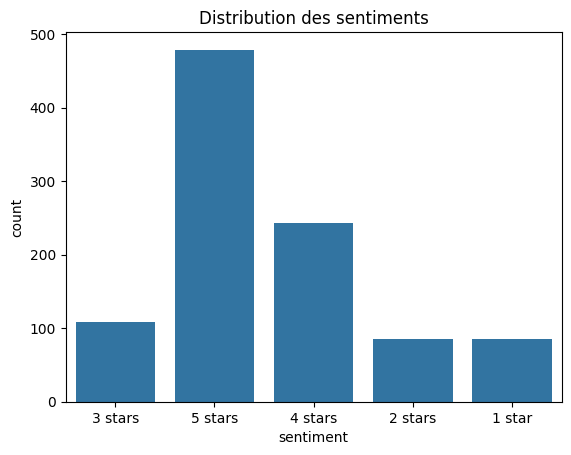

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des sentiments
sns.countplot(x='sentiment', data=reviews_data)
plt.title('Distribution des sentiments')
plt.show()

<ipython-input-10-51db509f3754>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


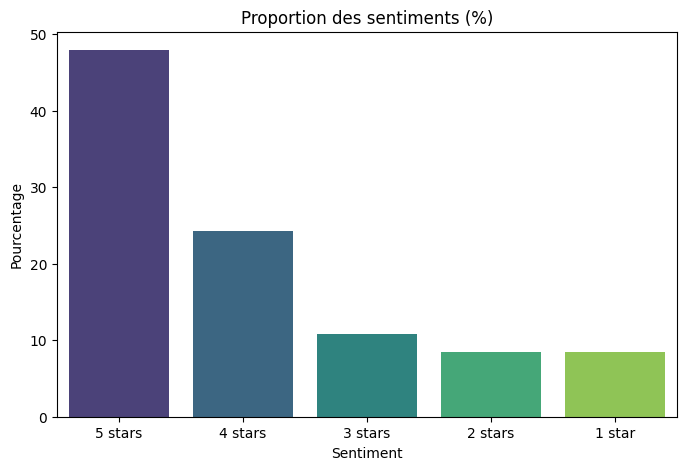

In [10]:
sentiment_counts = reviews_data['sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Proportion des sentiments (%)')
plt.ylabel('Pourcentage')
plt.xlabel('Sentiment')
plt.show()

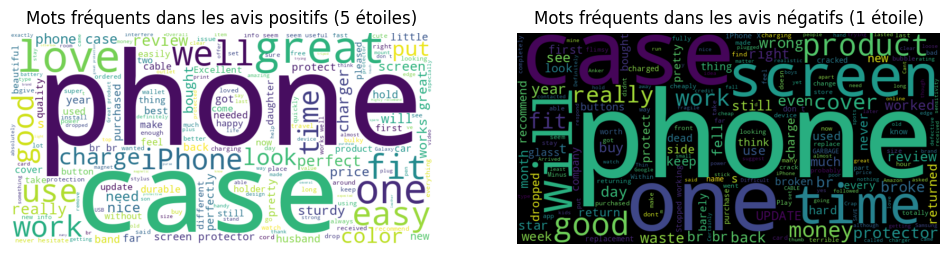

In [11]:
from wordcloud import WordCloud

# Filtrer les avis positifs et négatifs
positive_reviews = ' '.join(reviews_data[reviews_data['sentiment'] == '5 stars']['text'])
negative_reviews = ' '.join(reviews_data[reviews_data['sentiment'] == '1 star']['text'])

# Générer les Word Clouds
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_cloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Afficher les Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_cloud, interpolation='bilinear')
plt.title('Mots fréquents dans les avis positifs (5 étoiles)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.title('Mots fréquents dans les avis négatifs (1 étoile)')
plt.axis('off')

plt.show()

Division des données en lots (batches) à l’aide d’un outil comme un DataLoader

In [31]:
from torch.utils.data import Dataset, DataLoader
import torch

class ReviewDataset(Dataset):
    def __init__(self, texts, ratings, tokenizer, max_length=512):
        self.texts = texts
        self.ratings = ratings
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        rating = self.ratings[idx]

        # Tokenisation du texte
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'rating': torch.tensor(rating, dtype=torch.long)
        }

# Créer le DataLoader
batch_size = 16
dataset = ReviewDataset(texts, ratings, tokenizer)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Afficher le premier lot
for batch in dataloader:
    print(batch)
    break

{'input_ids': tensor([[  101, 11838, 38863,  ...,     0,     0,     0],
        [  101, 12050, 15635,  ...,     0,     0,     0],
        [  101, 11838, 24389,  ...,     0,     0,     0],
        ...,
        [  101, 28282, 10515,  ...,     0,     0,     0],
        [  101, 11838, 20058,  ...,     0,     0,     0],
        [  101, 11838, 46481,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'rating': tensor([5, 4, 5, 5, 4, 1, 5, 5, 3, 5, 5, 5, 5, 1, 5, 5])}


5. Évaluation des performances :

● Associez les sentiments prédits (1 étoile à 5 étoiles) à des scores numériques (de 1 à 5)

● Corrélation : Calculez la corrélation de Pearson entre les notes réelles et les prédictions.

In [12]:
# Conversion des sentiments en scores numériques
# Exemple : '5 stars' -> 5
reviews_data['predicted_score'] = reviews_data['sentiment'].apply(lambda x: int(x[0]))

# Affichage des colonnes pertinentes pour vérification
print(reviews_data[['rating', 'sentiment', 'predicted_score']].head())


   rating sentiment  predicted_score
0       4   3 stars                3
1       5   5 stars                5
2       5   4 stars                4
3       4   2 stars                2
4       5   5 stars                5


In [13]:
from scipy.stats import pearsonr

# Calcul de la corrélation de Pearson
correlation, p_value = pearsonr(reviews_data['rating'], reviews_data['predicted_score'])

# Affichage des résultats
print(f"Corrélation entre les notes réelles et prédictions : {correlation:.2f}")
print(f"P-value associée : {p_value:.3e}")


Corrélation entre les notes réelles et prédictions : 0.81
P-value associée : 3.627e-232


Commentaires :  

Une corrélation de 0.81 indique une relation linéaire forte et positive entre les notes réelles et les prédictions.
Cela signifie que les prédictions du modèle suivent généralement la tendance des notes réelles.

Une p-value extrêmement faible (≈ 0) indique que la corrélation observée est hautement statistiquement significative.

Matrice de confusion

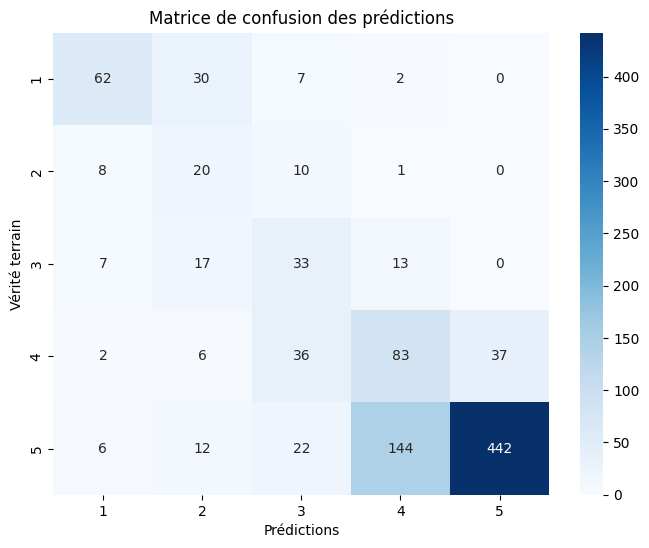

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(reviews_data['rating'], reviews_data['predicted_score'])

# Visualisation avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Matrice de confusion des prédictions')
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcul des métriques
accuracy = accuracy_score(reviews_data['rating'], reviews_data['predicted_score'])
precision = precision_score(reviews_data['rating'], reviews_data['predicted_score'], average='weighted')
recall = recall_score(reviews_data['rating'], reviews_data['predicted_score'], average='weighted')
f1 = f1_score(reviews_data['rating'], reviews_data['predicted_score'], average='weighted')

# Affichage des résultats
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Accuracy : 0.64
Precision : 0.74
Recall : 0.64
F1 Score : 0.67


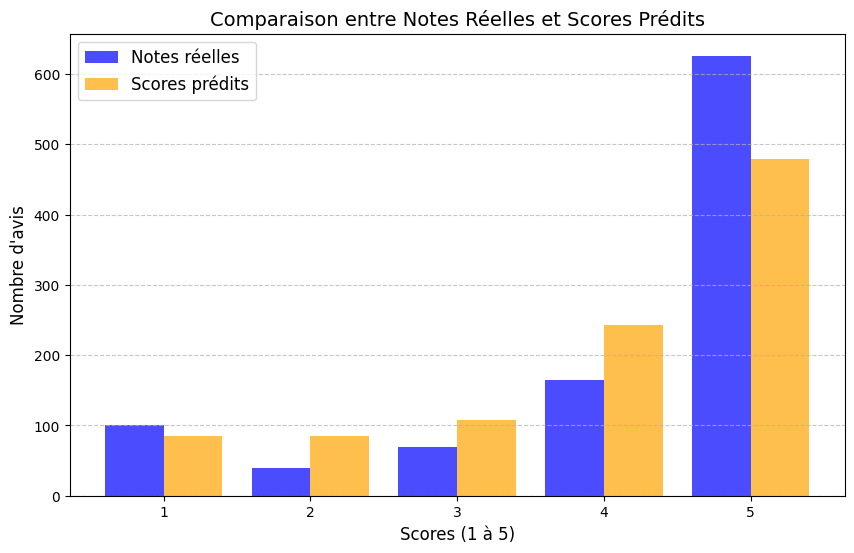

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des fréquences pour les notes réelles et les scores prédits
real_counts = reviews_data['rating'].value_counts().sort_index()
predicted_counts = reviews_data['predicted_score'].value_counts().sort_index()

# Liste des scores (de 1 à 5)
scores = np.arange(1, 6)

# Création du graphique en barres
plt.figure(figsize=(10, 6))

# Barres pour les notes réelles
plt.bar(scores - 0.2, real_counts[scores], width=0.4, alpha=0.7, label='Notes réelles', color='blue', align='center')

# Barres pour les scores prédits
plt.bar(scores + 0.2, predicted_counts[scores], width=0.4, alpha=0.7, label='Scores prédits', color='orange', align='center')

# Ajouter des titres, des labels et une légende
plt.xlabel('Scores (1 à 5)', fontsize=12)
plt.ylabel('Nombre d\'avis', fontsize=12)
plt.title('Comparaison entre Notes Réelles et Scores Prédits', fontsize=14)
plt.xticks(scores)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


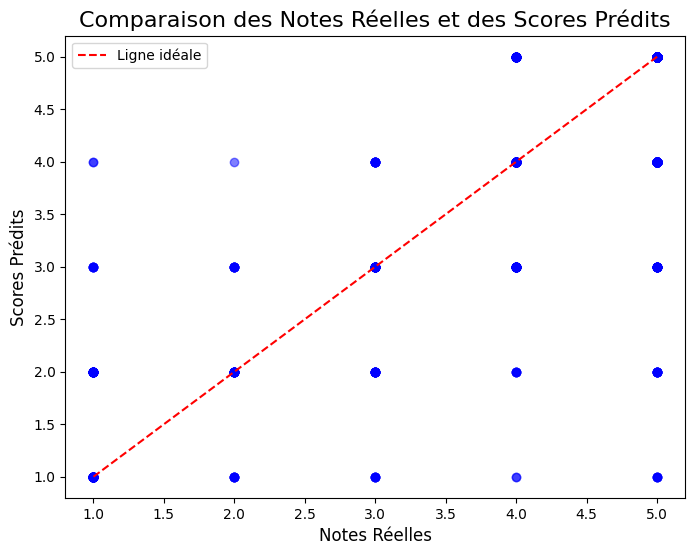

In [16]:
import matplotlib.pyplot as plt

# Création du scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reviews_data['rating'], reviews_data['predicted_score'], alpha=0.5, color='blue')

# Ajouter des titres et des labels
plt.title('Comparaison des Notes Réelles et des Scores Prédits', fontsize=16)
plt.xlabel('Notes Réelles', fontsize=12)
plt.ylabel('Scores Prédits', fontsize=12)

# Affichage de la ligne idéale (si le modèle prédit parfaitement)
plt.plot([1, 5], [1, 5], color='red', linestyle='--', label='Ligne idéale')

# Affichage de la légende
plt.legend()

# Affichage du plot
plt.show()


Visualiser l'erreur entre les notes réelles et les scores prédits

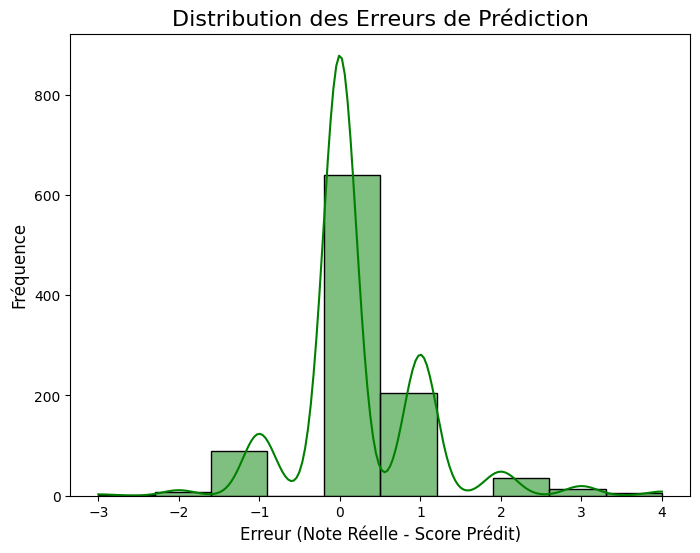

In [17]:
import seaborn as sns

# Calcul de l'erreur de prédiction
reviews_data['prediction_error'] = reviews_data['rating'] - reviews_data['predicted_score']

# Création du plot des erreurs (résidus)
plt.figure(figsize=(8, 6))
sns.histplot(reviews_data['prediction_error'], kde=True, color='green', bins=10)

# Ajouter des titres et des labels
plt.title('Distribution des Erreurs de Prédiction', fontsize=16)
plt.xlabel('Erreur (Note Réelle - Score Prédit)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Affichage du plot
plt.show()


Visualisation de la distribution des erreurs de prédiction par catégorie de note réelle

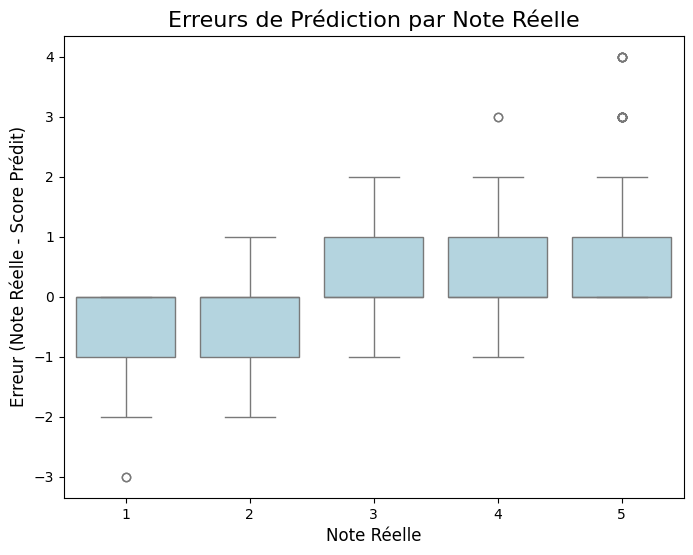

In [18]:
# Création du box plot des erreurs par note réelle
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='prediction_error', data=reviews_data, color='lightblue')

# Ajouter des titres et des labels
plt.title('Erreurs de Prédiction par Note Réelle', fontsize=16)
plt.xlabel('Note Réelle', fontsize=12)
plt.ylabel('Erreur (Note Réelle - Score Prédit)', fontsize=12)

# Affichage du plot
plt.show()
